# Decision Tree Model on Titanic Dataset

In [19]:
import numpy as np
import pandas as pd

In [20]:
data=pd.read_csv('titanic_eda.csv')

In [21]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,AgeGroup
0,1,0,3,22.0,1,0,7.2500,1,0,1,Adult
1,2,1,1,38.0,1,0,71.2833,0,0,0,Adult
2,3,1,3,26.0,0,0,7.9250,0,0,1,Adult
3,4,1,1,35.0,1,0,53.1000,0,0,1,Adult
4,5,0,3,35.0,0,0,8.0500,1,0,1,Adult


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
male           714 non-null int64
Q              714 non-null int64
S              714 non-null int64
AgeGroup       714 non-null object
dtypes: float64(2), int64(8), object(1)
memory usage: 61.5+ KB


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.625588,0.512605,0.431373,21.308270,0.634454,0.039216,0.778711
std,259.119524,0.491460,0.838250,14.323792,0.929783,0.853289,14.655611,0.481921,0.194244,0.415405
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000,0.000000,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,65.000000,5.000000,6.000000,71.283300,1.000000,1.000000,1.000000


In [24]:
data.drop(['PassengerId','Fare','AgeGroup'],axis=1,inplace=True)

In [25]:
X=data.iloc[:,1:].values
X.shape

(714, 7)

In [26]:
y=data.iloc[:,:1].values
y.shape

(714, 1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf = DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)


In [30]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
from sklearn import metrics

In [32]:
print("Accuracy",round(metrics.accuracy_score(y_test,y_pred)*100,2))

Accuracy 71.16


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[97, 28],
       [34, 56]], dtype=int64)

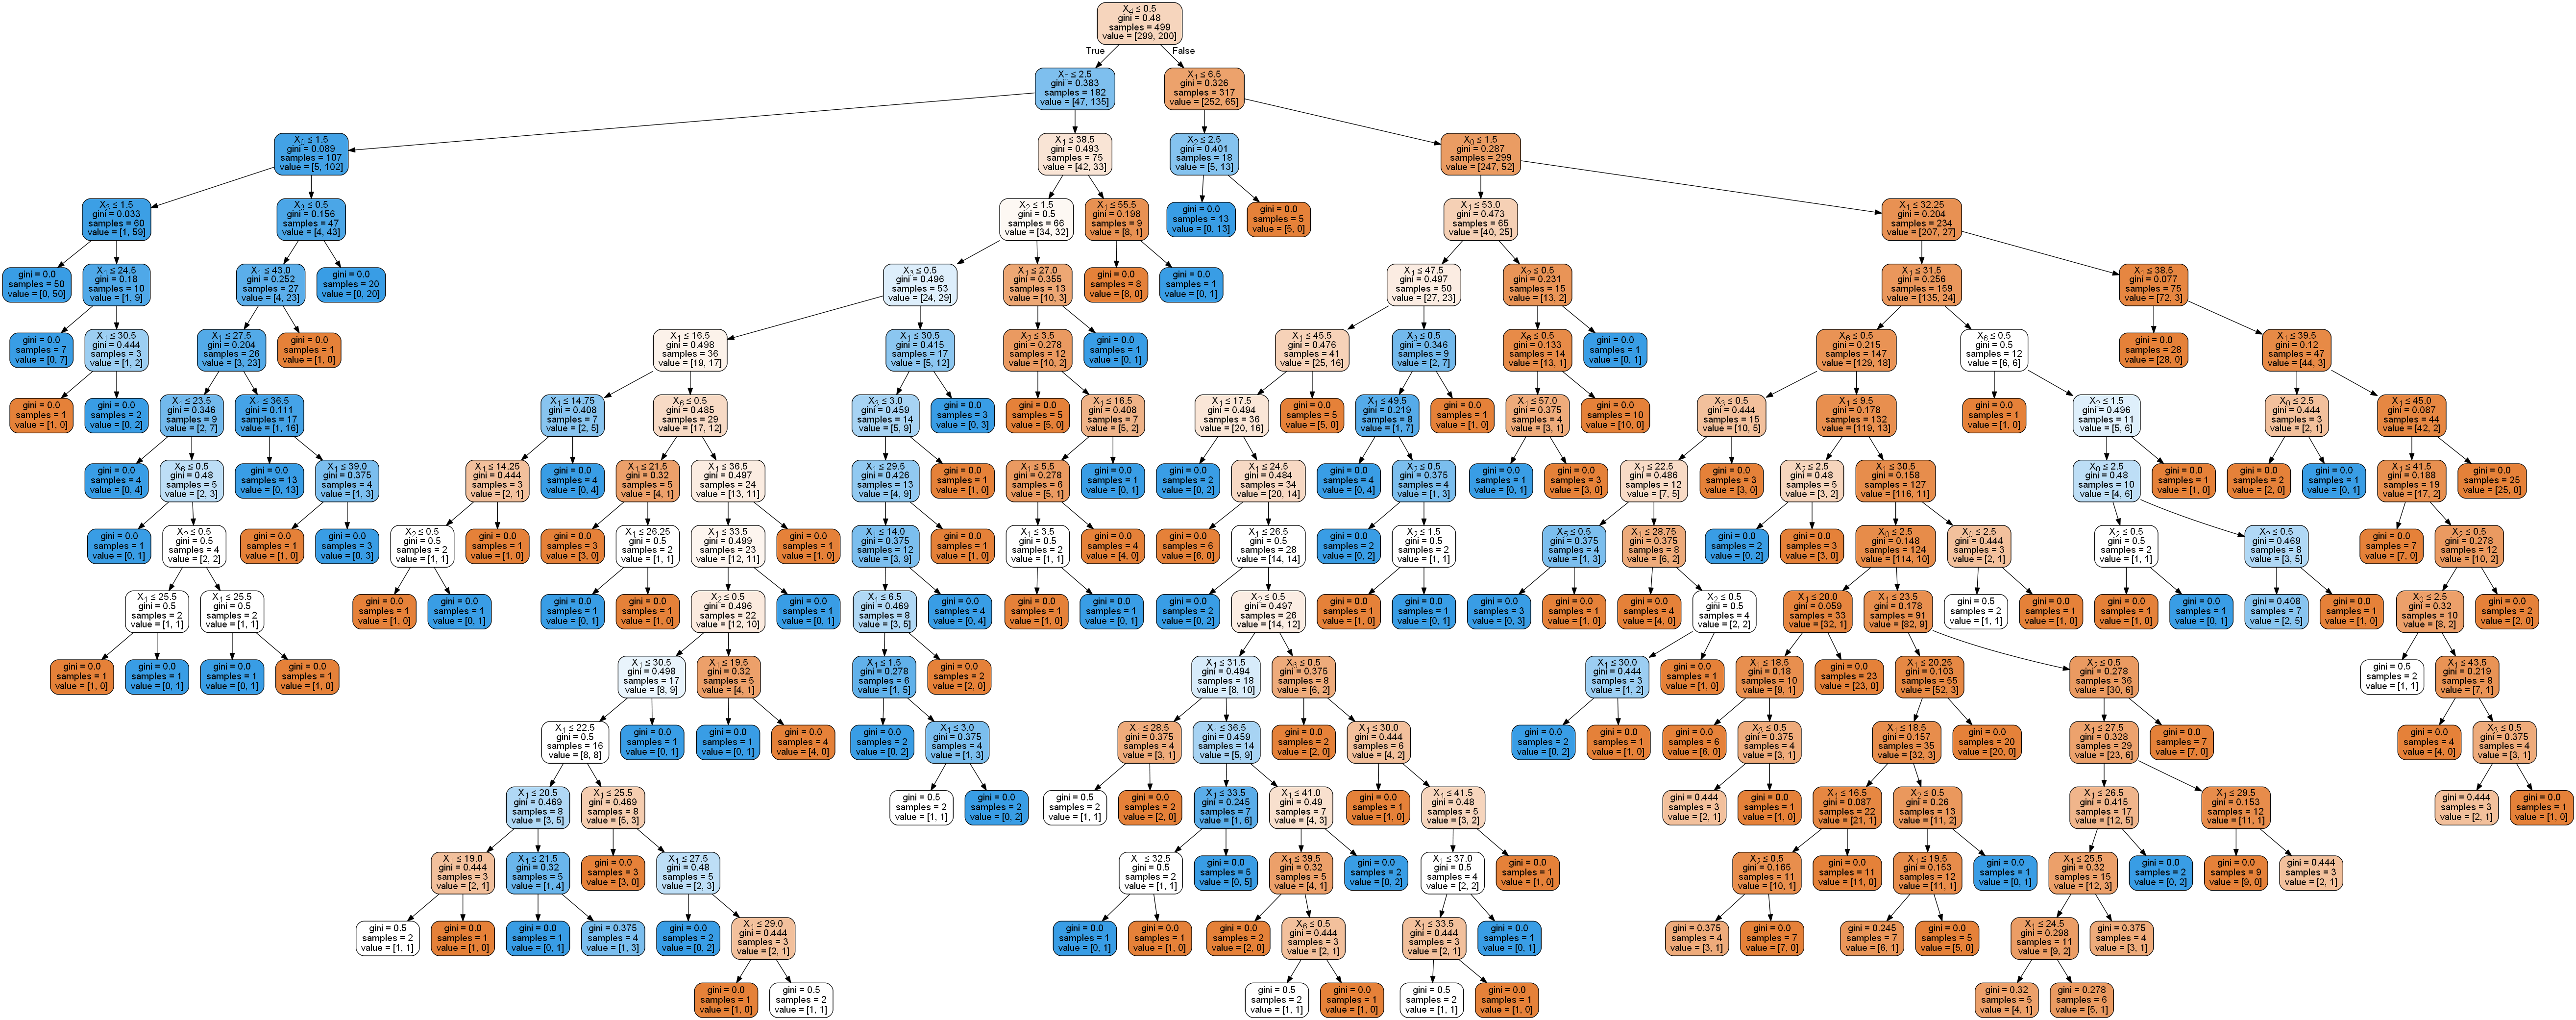

In [35]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)